<a href="https://colab.research.google.com/github/LerinaMM/mercado_financeiro_weg/blob/main/dados_mercado_financeiro_WEGE3_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dashboard Mercado Financeiro

1. Vamos utilizar o Yahoo Finance para captar dados do mercado financeiro

In [18]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Chamada de bibliotecas

In [19]:
# Pacotes para análises de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

#YFinance (dados do mercado financeiro)
import yfinance as yf
yf.pdr_override()

#Avisos
import warnings
warnings.filterwarnings('ignore')

##3. API Yahoo Finance

O YFinance oferece uma maneira segmentada e Pythonic de baixar dados do mercado do Yahoo finanças

In [20]:
#Coletando dados
Dados = web.get_data_yahoo('WEGE3.SA', period='5y' )

#Shape
Dados.shape

[*********************100%***********************]  1 of 1 completed


(1242, 6)

Dentro dos dados temos 1240 linhas e 6 colunas

In [21]:
#Verificando os dados
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-19,8.873076,8.873076,8.734615,8.834615,8.234540,1340820
2018-02-20,8.769230,8.961538,8.753846,8.826923,8.227373,3787420
2018-02-21,8.826923,8.961538,8.784615,8.784615,8.187937,6453720
2018-02-22,8.873076,9.023076,8.800000,8.842307,8.241711,4885920
2018-02-23,8.896153,9.219230,8.853846,9.173076,8.550012,6830200


In [22]:
#Registros mais recentes
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,38.520000,39.180000,38.360001,38.580002,38.580002,5129800
2023-02-14,38.630001,39.349998,38.169998,38.360001,38.360001,6066600
2023-02-15,38.880001,39.340000,38.500000,38.880001,38.880001,10995900
2023-02-16,38.720001,38.959999,37.799999,38.779999,38.779999,7342600
2023-02-17,38.549999,39.750000,38.419998,39.619999,39.619999,8000500


In [23]:
#Estatística descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03
mean,24.001670,24.410896,23.600046,23.991883,23.427872,8.517134e+06
std,12.054031,12.254805,11.838972,12.045103,11.973098,4.567073e+06
min,7.575000,7.720000,7.535000,7.605000,7.129938,0.000000e+00
25%,9.725000,9.856250,9.566250,9.711250,9.197925,5.483850e+06
50%,26.384999,26.750000,25.900000,26.365000,26.022571,7.352100e+06
75%,35.015000,35.577501,34.509998,35.017500,34.392375,1.032785e+07
max,46.459999,46.930000,44.799999,46.105000,44.782589,4.393400e+07


In [24]:
#Informação dos dados
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2018-02-19 to 2023-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1242 non-null   float64
 1   High       1242 non-null   float64
 2   Low        1242 non-null   float64
 3   Close      1242 non-null   float64
 4   Adj Close  1242 non-null   float64
 5   Volume     1242 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.9 KB


In [25]:
#Media Movel - Equilibrio de preços do mercado, para verificar o equilibrio dos preços no mercado, observando tendência de alta, média e baixa
# É um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

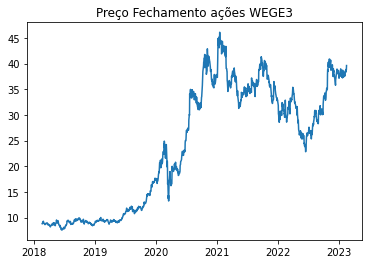

In [26]:
#Plotar os dados
plt.plot (Dados['Close'])
plt.title('Preço Fechamento ações WEGE3');

In [27]:
#Utilizando a função ROLLING
#É uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados, importante para calcular médias móveis, desvios padrão, somatórios mínimos e máximos, entre outras estatísticas

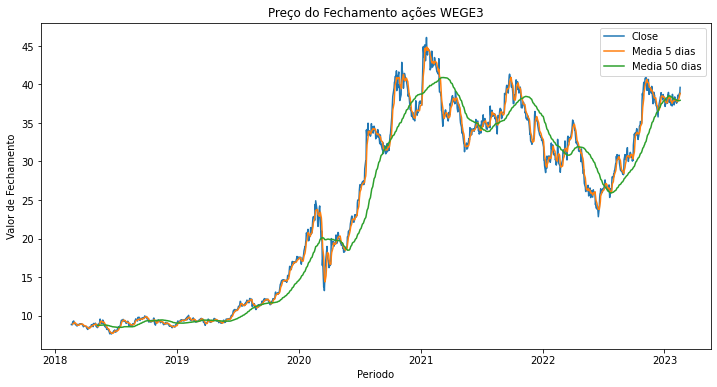

In [28]:
from pandas.core import window
Periodo = 5 #retirando uma média a cada 5 dias
Dados['Close'].rolling(window=Periodo).mean()

#Tamanho da imagem
plt.figure(figsize=(12,6))
plt.plot(Dados['Close'])
#Cria os dados da média movel e coloca junto com o grafico anterior
plt.plot(Dados['Close'].rolling(window=Periodo).mean())
plt.plot(Dados['Close'].rolling(window=Periodo + 50).mean())
plt.title('Preço do Fechamento ações WEGE3')
plt.legend(['Close', 'Media 5 dias', 'Media 50 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

Podemos perceber que as ações estão com tendência de crescimento conforme mostra a linha em verde, onde realizamos uma análise colocando um período onde agrupa os dados a cada 50 dias.

In [29]:
#Aplicar a media movel nos dados utilizando o Plotly

#retirando uma média a cada 5 dias
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling(window=Periodo).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Analise Fechamento WEGE3'
)

Figure.show()

In [30]:
#Gráfico de Candlestick

#É um estilo de grafico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada. 
#As caixas representam a dispersão entre os valores open close as linhas representam a dispersão entre os valores low e high

In [31]:
#Grafico Candlestick

Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close']
            #voce pode mudar as cores conforme comandos abaixo
            #increasing_line_color='cyan',
            #decreasing_line_color='cyan'
         )
    ]
)

Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Analise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Grafico_Candlestick.show()

In [35]:
#Criar a figura

Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}],
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

#Layout e Dimensão

Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics<\b> <br> Follow up WEGE3'
)

#Adicionando um grafico na primeira posição
Figura.add_trace(
    go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close']
    ),
    row=1, col=1,
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

#Adicionando um grafico na segunda posição

Figura.add_trace(
    go.Scatter(
            x=Dados.index,
            y=Dados['Close'],
            mode='lines',
            name='Fechamento'
            #line=dict(color='green')
    ),
    row=2, col=1
)

#Adicionando média movel

Figura.add_trace(
    go.Scatter(
            x=Dados.index,
            y=Dados['Media_Movel'],
            mode='lines',
            name='Media_Movel'
            #line=dict(color='black')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(size=10)
    )
   
)

Figura.add_annotation(
    showarrow=False,
    text='Análise realizada evento Data Viking',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Lerina Mesquita Mastruian',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

Podemos verificar que quem adquiriu a partir de **janeiro de 2019** com preço médio de **R$ 9,19**.

Em **janeiro de 2021** a ação chegou no seu preço máximo de **R$ 45,14** onde obteve uma valorização de **491%**